In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/Zip_Codes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,OBJECTID,ZIP,ZIPCODE,COUNTY,SHAPE_Length,SHAPE_Area,geometry
0,1,98031,98031,033,117508.211718,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21896 47.4..."
1,2,98032,98032,033,166737.664791,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2436..."
2,3,98033,98033,033,101363.840369,2.566747e+08,"POLYGON ((-122.20571 47.65170, -122.20571 47.6..."
3,4,98034,98034,033,98550.452509,2.725072e+08,"POLYGON ((-122.17551 47.73706, -122.17551 47.7..."
4,5,98030,98030,033,94351.264837,2.000954e+08,"POLYGON ((-122.16746 47.38549, -122.16746 47.3..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

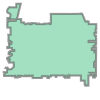

In [5]:
zipcodes.loc[0, 'geometry']
           

In [6]:
print(zipcodes.loc[0,'geometry'])

POLYGON ((-122.2184228967409 47.4375036485968, -122.2189608579872 47.43750323467437, -122.2195751231035 47.43750274754203, -122.2215977070777 47.43750114891263, -122.221599480235 47.43495688786757, -122.2217051615142 47.43495715523315, -122.2236089280028 47.43496199431645, -122.2237345712798 47.43496209930488, -122.2258776912757 47.43496388129194, -122.2261238503739 47.43508413516542, -122.2261886312792 47.43511744801654, -122.2262884740379 47.43516579242339, -122.2262886113923 47.43516566719561, -122.2264887039913 47.43497890626116, -122.2266134209416 47.43486319441269, -122.226718882967 47.43476438576499, -122.2267982615053 47.4346914367485, -122.226908145779 47.43458841811856, -122.2269589857694 47.43454345348303, -122.227018507895 47.43448393909365, -122.2270844426768 47.43441818005568, -122.2271457879513 47.43435055127265, -122.2271841084688 47.43431049110315, -122.2272605354001 47.43422142788365, -122.2273206952259 47.43414785273184, -122.2273813395292 47.43407290141175, -122.227

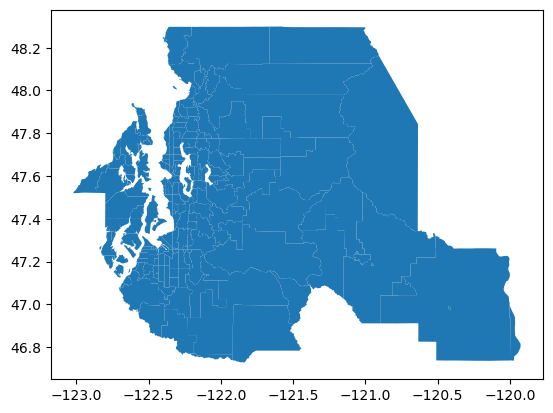

In [8]:
zipcodes.plot();

In [16]:
art = pd.read_csv('../data/Public_Art_Data.csv')
print(art.shape)
art.head(3)

(316, 15)


,sac_id,project,artist_first_name,artist_last_name,title,description,classification,media,measurements,date,location,address,latitude,longitude,Geolocation
0,ESD00.074.02,CENTRAL LIBRARY,George,Tsutakawa,Fountain of Wisdom,'',Sculpture,Welded bronze,NaN,1957-60,"Central Library, Spring St Plaza",1000 4th Ave,47.606500,-122.333120,"1000 4th Ave\nSeattle, WA\n(47.6065, -122.33312)"
1,CL77.025,SEATTLE CENTER SCULPTURE GARDEN,Doris,Chase,Moon Gates,'',Sculpture,NaN,NaN,6/23/99,Space Needle Sculpture Garden,305 Harrison St,47.620033,-122.348917,"305 Harrison St\nSeattle, WA\n(47.620033, -122..."
2,CL99.053,WEST GILMAN BRIDGE,Mark,Lere,Seattle Scatter Piece,'',Sculpture,"Concrete, terrazzo",NaN,1991,West Gilman Bridge,23rd Ave W & Gilman Ave W,47.632467,-122.375650,"23rd Ave W & Gilman Ave W\nSeattle, WA\n(47.6..."


In [17]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sac_id             308 non-null    object 
 1   project            298 non-null    object 
 2   artist_first_name  279 non-null    object 
 3   artist_last_name   294 non-null    object 
 4   title              316 non-null    object 
 5   description        315 non-null    object 
 6   classification     305 non-null    object 
 7   media              302 non-null    object 
 8   measurements       226 non-null    object 
 9   date               288 non-null    object 
 10  location           314 non-null    object 
 11  address            291 non-null    object 
 12  latitude           316 non-null    float64
 13  longitude          316 non-null    float64
 14  Geolocation        316 non-null    object 
dtypes: float64(2), object(13)
memory usage: 37.2+ KB


In [19]:
art['geometry'] = art.apply(lambda x: Point((x.longitude, 
                                            x.latitude)), 
                                        axis=1)
art.head(3)

,sac_id,project,artist_first_name,artist_last_name,title,description,classification,media,measurements,date,location,address,latitude,longitude,Geolocation,geometry
0,ESD00.074.02,CENTRAL LIBRARY,George,Tsutakawa,Fountain of Wisdom,'',Sculpture,Welded bronze,NaN,1957-60,"Central Library, Spring St Plaza",1000 4th Ave,47.606500,-122.333120,"1000 4th Ave\nSeattle, WA\n(47.6065, -122.33312)",POINT (-122.33312 47.6065)
1,CL77.025,SEATTLE CENTER SCULPTURE GARDEN,Doris,Chase,Moon Gates,'',Sculpture,NaN,NaN,6/23/99,Space Needle Sculpture Garden,305 Harrison St,47.620033,-122.348917,"305 Harrison St\nSeattle, WA\n(47.620033, -122...",POINT (-122.348917 47.620033)
2,CL99.053,WEST GILMAN BRIDGE,Mark,Lere,Seattle Scatter Piece,'',Sculpture,"Concrete, terrazzo",NaN,1991,West Gilman Bridge,23rd Ave W & Gilman Ave W,47.632467,-122.375650,"23rd Ave W & Gilman Ave W\nSeattle, WA\n(47.6...",POINT (-122.37565 47.632467)
